# Land Cover Change Detection and Description

The purpose of this notebook is to provide an easy to use method for comparing and visualising differences between 2 tiles which were classified using the L3 FAO land cover classification system.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import lccs_change
import matplotlib.pyplot as plt
import matplotlib as mplt

### Define your input files
* *period1*: classified file for first time period
* *period2*: classified file for second time period
* *outputfile*: name of difference file to be save out

In [2]:
period1 = xr.open_rasterio('Townsville-2010.tif')
period2 = xr.open_rasterio('Townsville-2015.tif')
outputfile =               'Townsville-diff.tif'

# period1 = xr.open_rasterio('Forescue-2010.tif')
# period2 = xr.open_rasterio('Forescue-2015.tif')
# outputfile =               'Forescue-diff.tif'

# period1 = xr.open_rasterio('Snowy-2010.tif')
# period2 = xr.open_rasterio('Snowy-2015.tif')
# outputfile =               'Snowy-diff.tif'

# period1 = xr.open_rasterio('Gwydir-2010.tif')
# period2 = xr.open_rasterio('Gwydir-2015.tif')
# outputfile =               'Gwydir-diff.tif'

# period1 = xr.open_rasterio('Leichhardt-2010.tif')
# period2 = xr.open_rasterio('Leichhardt-2015.tif')
# outputfile =               'Leichhardt-diff.tif'

In [3]:
# Drop "band" coord if present (thanks, rasterio)
if 'band' in period1.coords: period1 = period1.isel(band=0, drop=True)
if 'band' in period2.coords: period2 = period2.isel(band=0, drop=True)
    
# Examine unique values in the loaded data (debugging)
print("T0:",np.unique(period1.values))
print("T1:",np.unique(period2.values))

T0: [111 112 123 124 215 216 227 228]
T1: [111 112 123 124 215 216 227 228]


### Run Change detection

In [4]:
# Process all changes
changes = lccs_change.LCCS_ChangeDetect(period1, period2)

# or, only a particular type of change
#changes = lccs_change.LCCS_ChangeDetect(period1, period2, showonly=['degradation'])

# print(changes)

### Visualise the changes


CTV: Cultivated terrestrial veg <br>
NTV: Natural terrestrial veg<br>
CAV: Cultivated aquatic veg<br>
NAV: Natural aquatic veg<br>
AS: Artificial surfaces<br>
BS: Bare soil<br>
AW: Artificial water<br>
NW: Natural water<br>

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe370113320>)

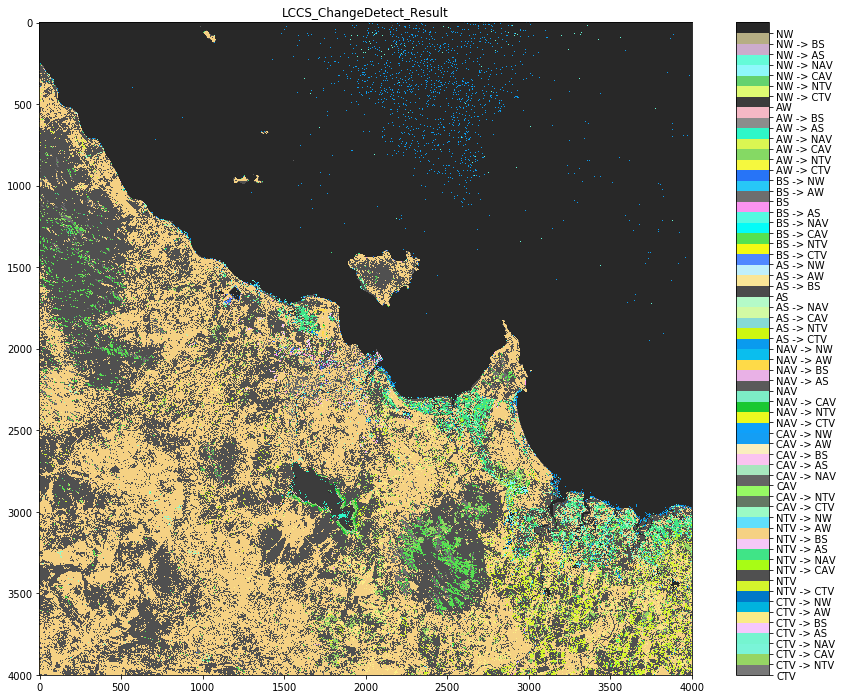

In [5]:
lccs_change.LCCS_Plot(changes)

### Detailed statistics about the changes

The following statistics can be used to report on several SDGs.
* 15.3.1 subsection on land change, can be reported using the *ChangeType* column. 
* 11.3.1 can be calculated by combining changes which represent land consumption, with an external dataset for population growth.
* 6.6.1 can be calculated by looking at the change categories which relate to stable water, wetland drainage, innundation and vegetation encroachment

In [6]:
changes.stats

,Value,Count,ChangeType,Label,Description,PctOfTotal,PctOfValid
61,228228,7583023,stable,NW,stable,47.393894,47.393894
13,112216,3619897,degradation,NTV -> BS,vegetation loss,22.624356,22.624356
9,112112,3475427,stable,NTV,stable,21.721419,21.721419
1,111112,176730,improvement,CTV -> NTV,afforestation,1.104563,1.104563
45,216216,171251,stable,BS,stable,1.070319,1.070319
8,112111,167801,degradation,NTV -> CTV,agricultural expansion,1.048756,1.048756
5,111216,157543,degradation,CTV -> BS,vegetation loss,0.984644,0.984644
11,112124,115061,degradation,NTV -> NAV,inundation,0.719131,0.719131
41,216112,113604,improvement,BS -> NTV,vegetation establishment,0.710025,0.710025
31,124228,77249,degradation,NAV -> NW,inundation,0.482806,0.482806


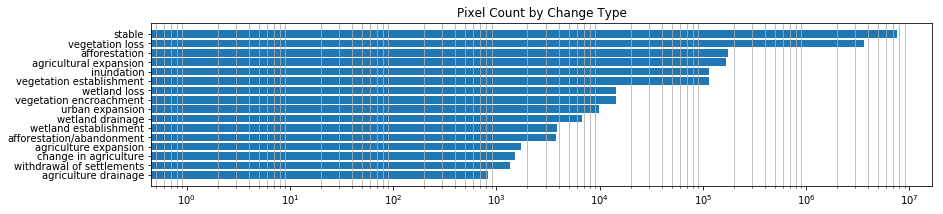

In [7]:
piedata = np.array(changes.stats[['Description','Count']]).T
plt.figure(figsize=(14,3))
plt.grid(True, which='minor', axis='x')
plt.barh(piedata[0], piedata[1], log=True)
plt.gca().invert_yaxis()
plt.title('Pixel Count by Change Type')
plt.show()

In [ ]:
# TODO: Change matrix w/ counts (or pcts)

### Save to disk

In [8]:
lccs_change.write_diff(changes, outputfile, debug=False)

In [ ]:
# # Check the output file
# %%bash -s "$outputfile"
# ls -lh $1
# gdalinfo $1 